## Simple Linear regression
### Case Global Warming
* **Simple linear regression** is the **simplest** regression algorithm
* Given a collection of numeric values representing an **independent variable** and a **dependent variable**, simple linear regression **describes the relationship between these variables with a straight line**, known as the **regression line**
* Using a **time series** of average Brussels winter temperature data for 1834 through 2019, we'll:
    * Perform **simple linear regression**
    * Display a **scatter plot** with a **regression line** 
    * Use the **coefficient** and **intercept values** calculated by the estimator to **make predictions**
* Temperature data stored in **`wintertempbrussels.xlsx`**
* Data source: https://opendata.vlaanderen.be/dataset/e09e922e-f67e-4e58-8a0d-f5ce17185d39

<hr style="height:2px; border:none; color:black; background-color:black;">

### Loading the Average High Temperatures into a `DataFrame` 
* Load the data from `wintertempbrussels.csv`and display a few data samples:

In [1]:
import pandas as pd

brussels = pd.read_excel('data/wintertempbrussels.xlsx')

print(brussels.head(3))
print(brussels.tail(3))

   Year  Temperature
0  1834          5.4
1  1835          4.2
2  1836          2.0
     Year  Temperature
183  2017          3.9
184  2018          3.8
185  2019          5.2


<hr style="height:2px; border:none; color:black; background-color:black;">

### Visualizing the Dataset
* Create a **scatter plot**
* **Note:** All code that modifies a graph must be in the same notebook cell

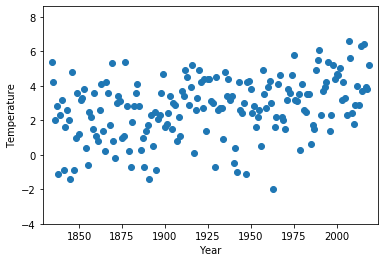

In [2]:
# Plot the dataset
import matplotlib.pyplot as plt
# enable Matplotlib in this notebook.
%matplotlib inline

xmin = brussels.Year.min() - 5 
xmax = brussels.Year.max() + 5 
ymin = brussels.Temperature.min() - 2
ymax = brussels.Temperature.max() + 2

plt.xlim([xmin, xmax])
plt.ylim([ymin,ymax])
plt.scatter(brussels.Year, brussels.Temperature)

plt.xlabel('Year')
plt.ylabel('Temperature')

plt.show()

<hr style="height:2px; border:none; color:black; background-color:black;">

### Splitting the Data for Training and Testing
* We’ll use the **`LinearRegression`** estimator from **`sklearn.linear_model`** 
* By default, this estimator uses **all** the **numeric features** in a dataset to perform **multiple linear regression**  
* For **simple linear regression** select **one** feature (the `Date` here) as the **independent variable**
* Select `Temperature` as the dependent variable

In [4]:
from sklearn.model_selection import train_test_split
X = brussels.drop('Temperature',axis=1)
y = brussels['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

print(X_train.shape)

print(X_test.shape)

(148, 1)
(38, 1)


<hr style="height:2px; border:none; color:black; background-color:black;">

### Training the Model (1 of 2)
* [**LinearRegression default settings**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [5]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* To find the **best fitting regression line** for the data, the `LinearRegression` estimator **iteratively adjusts** the **slope** and **intercept** to **minimize** the **sum of the squares** of the data points’ **distances** from the line 


<hr style="height:2px; border:none; color:black; background-color:black;">

### Training the Model (2 of 2)
* We'll soon use **slope** and **intercept** to make **predictions** with 

\begin{equation}
y = m x + b
\end{equation}

* Slope is the estimator’s **`coeff_`** attribute (**m** in the equation) 
* Intercept is the estimator’s **`intercept_`** attribute (**b** in the equation)

In [6]:
linear_regression.coef_

array([0.01144087])

This value (the slope) can be interpreteded as follows: every year the temperature in January increases with this amount of °C. Remark that due to the random selection of the training set the slope differs with each run. 

In [7]:
linear_regression.intercept_

-19.386281204162014

<hr style="height:2px; border:none; color:black; background-color:black;">

### Testing the Model
* Test the model using the data in **`X_test`** and check some of the **predictions**

In [8]:
predicted = linear_regression.predict(X_test)

expected = y_test

Python built-in function **zip** enables you to iterate over _multiple_ iterables of data at the _same_ time. The function receives as arguments any number of iterables and returns an iterator that produces tuples containing the elements at the same index in each. An iterable is an object that can be iterated (like list, dictionary, tuple, ...).  
  
The code `predicted[::5]` uses a step of 5 to create a slice with every 5th element

In [9]:
for p, e in zip(predicted[::5], expected[::5]):  # check every 5th element
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 3.66, expected: 6.30
predicted: 1.91, expected: 0.80
predicted: 1.93, expected: 4.10
predicted: 2.64, expected: 4.40
predicted: 1.81, expected: 3.80
predicted: 3.19, expected: 3.60
predicted: 3.00, expected: 4.90
predicted: 2.34, expected: 4.70


<hr style="height:2px; border:none; color:black; background-color:black;">

## Determine the accuracy of a regression model

Evaluation metrics for classification problems, such as `accuracy` or `precision`, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values. 
  
Several options exist:
1. The **Mean Absolute Error (MAE)**. This is the mean of the absolute value of the errors. It's the average error. It is calculated as:
\begin{equation}
MAE=\ \frac{\sum_{i=1}^{n}\left|y_i-\ {\hat{y}}_i\right|}{n}
\end{equation}    
  
2. The **Mean Squared Error (MSE)** is the mean of the squared errors. The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. MSE is preferred over MAE if you wish to "punish" larger errors. 
\begin{equation}  
MSE=\ \frac{\sum_{i=1}^{n}\left(y_i-\ {\hat{y}}_i\right)^2}{n}
\end{equation}    
  
3. The **Root Mean Square Error (RMSE)**. This is the square root of the mean of the squared errors.   RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
It is easier to put in context as it's the same units as the response variable. 
RMSE is calculated as:
\begin{equation}
RMSE=\ \sqrt{\frac{\sum_{i=1}^{n}\left(y_i-\ {\hat{y}}_i\right)^2}{n}}
\end{equation}    
   
4.	$R^2$ or R squared. This is a statistic that gives some information about the goodness of fit of a model. In regression, the $R^2$ coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An $R^2$ of 1 indicates that the regression predictions perfectly fit the data. Values of $R^2$ outside the range 0 to 1 can occur when the model fits the data worse than a horizontal hyperplane. This means: the closer $R^2$ is to 1 (but lower than 1) the better our model. 

In [10]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(expected,predicted)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(expected,predicted)
print('Mean Squared Error: '+ str(MSE))
print()

import numpy as np
RMSE = np.sqrt(metrics.mean_squared_error(expected,predicted))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(expected,predicted)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 1.2654166622043495

Mean Squared Error: 2.3199851192630008

Root Mean Squared Error: 1.5231497363237145

R square: 0.10904831740310117



<hr style="height:2px; border:none; color:black; background-color:black;">

### Predicting Future Temperatures and Estimating Past Temperatures 
* Use the **coefficient** and **intercept** values to make **predictions** 
* Python supports the concept of lambda functions: functions that can be defined inline and assigned to a variable

In [11]:

# lambda implements y = mx + b
predict = (lambda x: linear_regression.coef_ * x + 
                     linear_regression.intercept_)

print(predict(1890))
print(predict(2020))
print(predict(2100))

[2.23696046]
[3.72427338]
[4.63954287]


<hr style="height:2px; border:none; color:black; background-color:black;">

### Add the Regression Line to the visualization

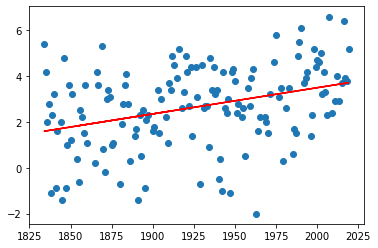

In [12]:
plt.scatter(X_train,y_train)
plt.plot(X_train, linear_regression.intercept_ + X_train * linear_regression.coef_, color='red')

plt.show()

<hr style="height:2px; border:none; color:black; background-color:black;">

### What if we restrict data to >= 1950? 
Is global warming getting worse since 1950? 

In [13]:
brussels = brussels[brussels['Year'] >= 1950]

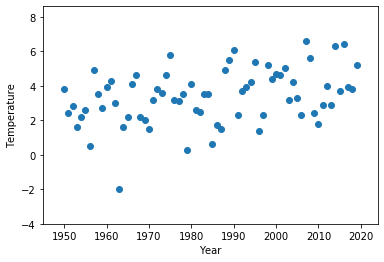

In [14]:
xmin = brussels.Year.min() - 5 
xmax = brussels.Year.max() + 5 
ymin = brussels.Temperature.min() - 2
ymax = brussels.Temperature.max() + 2

plt.xlim([xmin, xmax])
plt.ylim([ymin,ymax])
plt.scatter(brussels.Year, brussels.Temperature)

plt.xlabel('Year')
plt.ylabel('Temperature')

plt.show()

In [16]:
X = brussels.drop('Temperature',axis=1)
y = brussels['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
linear_regression.fit(X=X_train, y=y_train)
linear_regression.coef_

array([0.02506642])

The regression coefficient is clearly larger. What will, according to this model, be the temperature in 2100? 

In [17]:
print(predict(2100))

[6.50595666]


In [18]:
predicted = linear_regression.predict(X_test)

expected = y_test

MAE = metrics.mean_absolute_error(expected,predicted)
print('Mean Absolute Error: '+ str(MAE))
print()

Mean Absolute Error: 1.7401848090412024

